In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys,os
sys.path.append('..')
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
from backtester.swarms.swarm import Swarm
from backtester.exoinfo import EXOInfo
from exobuilder.data.exostorage import EXOStorage
from IPython.core.display import display, HTML

import pandas as pd
import numpy as np
import scipy
import pprint

In [3]:
# Loading global setting for MongoDB etc.
from scripts.settings import *

try:
    from scripts.settings_local import *
except:
    pass

In [4]:
storage = EXOStorage(MONGO_CONNSTR, MONGO_EXO_DB)
pp = pprint.PrettyPrinter(indent=4)


## View EXO data

In [5]:
exo_list = storage.exo_list()

In [6]:
pp.pprint(exo_list)

[   'ES_BullishCollarBW',
    'ES_BearishCollarBW',
    'ES_CallSpread',
    'ES_PutSpread',
    'ES_BullishCollar',
    'CL_BullishCollarBW',
    'CL_BearishCollarBW',
    'ES_ContFut',
    'ES_BullishCall',
    'CL_CallSpread',
    'CL_PutSpread',
    'ZN_BullishCollarBW',
    'ZN_BearishCollarBW',
    'ZN_CallSpread',
    'ZN_PutSpread']


### View single EXO

In [16]:
exo_series, exo_dict = storage.load_series('ES_BullishCollarBW')

In [17]:
# Exo meta-information
pp.pprint(exo_dict)

{   'margin': 0,
    'name': 'ES_BullishCollarBW',
    'pcf': [],
    'pcfqty': [],
    'underlying': ''}


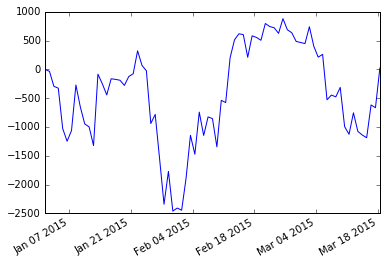

In [18]:
exo_series['exo'].plot()

### Save EXO data to CSVs

In [29]:
links = ''
if not os.path.exists('export'):
    os.mkdir('export')
if not os.path.exists(os.path.join('export', 'exo')):
    os.mkdir(os.path.join('export', 'exo'))
    
for exo_name in sorted(exo_list):
    exo_series, exo_dict = storage.load_series(exo_name)
    exo_series['exo'].to_csv(os.path.join('export', 'exo', exo_name+'.csv'))    
    links += '<a href="export/exo/{0}.csv" target="_blank">{0}</a><br>'.format(exo_name)

display(HTML('<h3>EXO list available for downloading</h3>'))
display(HTML(links))

# Alpha export

### List of available products in Mongo

In [32]:
swm_info = storage.swarms_info()
pp.pprint(swm_info)

{   '_id': None,
    'alphas': [   'RenkoPatterns_no_exit_on_patterns',
                  'PointAndFigurePatterns',
                  'SwingPoint',
                  'MACross',
                  'IchimokuCloud',
                  'VolatilityCompression',
                  'BollingerBands'],
    'exo_types': [   'BullishCall',
                     'PutSpread',
                     'CallSpread',
                     'BullishCollar',
                     'BearishCollarBW',
                     'ContFut',
                     'BullishCollarBW'],
    'instruments': ['CL', 'ES']}


### Getting swarm using filter

In [33]:
instruments_filter = ['*']  # Select ALL
#instruments_filter = ['ES', 'CL']

exo_filter = ['*'] # Select ALL
exo_filter = ['BullishCollar']

direction_filter = [0, -1, 1] # Select ALL
direction_filter = [1]

alpha_filter = ['*']  # Select ALL
#alpha_filter = ['MaCross', 'PointAndFigurePatterns']

swmdf, swm_data = storage.swarms_list(instruments_filter, direction_filter, alpha_filter, exo_filter)

## Swarms loaded

In [34]:
[print(s) for s in sorted(swmdf.columns)];

CL_BullishCollarBW_Long_BollingerBands
CL_BullishCollarBW_Long_IchimokuCloud
CL_BullishCollarBW_Long_MACross
CL_BullishCollarBW_Long_PointAndFigurePatterns
CL_BullishCollarBW_Long_RenkoPatterns_no_exit_on_patterns_no-exit-on-patterns
CL_BullishCollarBW_Long_SwingPoint
CL_BullishCollarBW_Long_VolatilityCompression
ES_BullishCollarBW_Long_BollingerBands
ES_BullishCollarBW_Long_IchimokuCloud
ES_BullishCollarBW_Long_MACross
ES_BullishCollarBW_Long_PointAndFigurePatterns
ES_BullishCollarBW_Long_RenkoPatterns_no_exit_on_patterns_no-exit-on-patterns
ES_BullishCollarBW_Long_SwingPoint
ES_BullishCollarBW_Long_VolatilityCompression
ES_BullishCollar_Long_BollingerBands
ES_BullishCollar_Long_IchimokuCloud
ES_BullishCollar_Long_MACross
ES_BullishCollar_Long_PointAndFigurePatterns
ES_BullishCollar_Long_RenkoPatterns_no_exit_on_patterns_no-exit-on-patterns
ES_BullishCollar_Long_SwingPoint
ES_BullishCollar_Long_VolatilityCompression


### Saving swarm equities (picked_equity lines)

In [35]:


links = ''
if not os.path.exists('export'):
    os.mkdir('export')
if not os.path.exists(os.path.join('export', 'swarms')):
    os.mkdir(os.path.join('export', 'swarms'))
    
for swm_name in sorted(sorted(swmdf.columns)):
    
    swmdf[swm_name].to_csv(os.path.join('export', 'swarms', swm_name+'.csv'))    
    
    links += '<a href="export/swarms/{0}.csv" target="_blank">{0}</a><br>'.format(swm_name)

display(HTML('<h3>Swarms list available for downloading</h3>'))
display(HTML(links))

# Add all files to the ZIP archive

In [41]:
import shutil
shutil.make_archive('export', 'zip', 'export');
display(HTML('<a href="export.zip" target="_blank">Download all files (.zip archive)</a>'))